# Set up notebook

In [1]:
%load_ext rpy2.ipython

## r libraries

In [4]:
%%R
library(dplyr)
library(Seurat)
library(patchwork)
library(data.table)
library(DropletUtils)
library(scRNAseq)
library(scater)
library(scran)
library(PCAtools)
library(celda)
set.seed(110010101)

path_to <- "VSG-2_2_count6/outs/"

## python libraries

In [3]:
#!conda env export > environment.yml

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

path_to = "VSG-2_2_count6/outs/"

## Estimate and remove Background

R[write to console]: Loading raw count data

R[write to console]: Loading cell-only count data

R[write to console]: Loading extra analysis data where available

R[write to console]: 7 genes passed tf-idf cut-off and 7 soup quantile filter.  Taking the top 7.

R[write to console]: Using 10 independent estimates of rho.

R[write to console]: Estimated global rho of 0.39

R[write to console]: Estimated contamination is very high (0.39).

R[write to console]: Expanding counts from 7 clusters to 6863 cells.



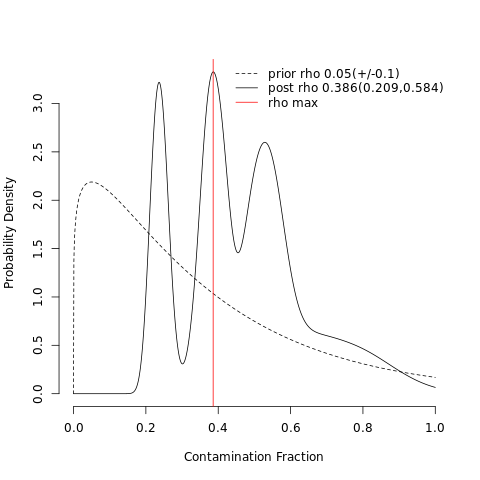

In [6]:
%%R
library(SoupX)
sce = load10X('VSG-2_2_count6/outs/')
sce = autoEstCont(sce, tfidfMin=0.85, forceAccept=TRUE)#, priorRhoStdDev = 0.3
out = adjustCounts(sce, roundToInt=TRUE)

In [7]:
%%R
head(sce$soupProfile[order(sce$soupProfile$est, decreasing = TRUE), ], n = 20)
#head(sce$soupProfile)

                             est counts
vsg-2-Tb427.BES40.22 0.035313192  54995
rRNA-Tb927.2.1975    0.023891225  37207
Tb927.1.2390         0.004257232   6630
rRNA-Tb927.6.187     0.004087713   6366
Tb927.5.1810         0.003202235   4987
Tb11.v5.0632         0.002123479   3307
Tb11.v5.0381         0.002048993   3191
maxic-12S            0.002029088   3160
Tb11.v5.0498         0.001968087   3065
Tb927.11.19810       0.001815263   2827
Tb927.5.810          0.001743988   2716
Tb927.3.3270         0.001722156   2682
Tb11.1810b           0.001645744   2563
Tb927.10.8940        0.001618775   2521
Tb927.10.10000       0.001523100   2372
Tb927.2.370          0.001472373   2293
Tb927.11.9590        0.001429993   2227
Tb927.8.1870         0.001285517   2002
Tb927.6.560          0.001234790   1923
Tb927.9.12570        0.001212316   1888


In [8]:
#Tb927.1.2390 beta tubulin
#Tb927.1.2390 ysosomal/endosomal membrane protein p67
#Tb11.v5.0498 lysosomal alpha-mannosidase precursor, putative
#Tb927.10.8940 flagellum targeting protein kharon1, putative
#Tb927.3.3270 ATP-dependent 6-phosphofructokinase, glycosomal

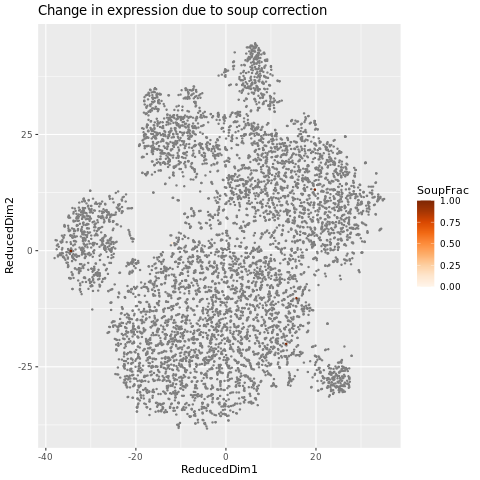

In [9]:
%%R
plotChangeMap(sce, out, "vsg-6-Tb427.BES15.12")

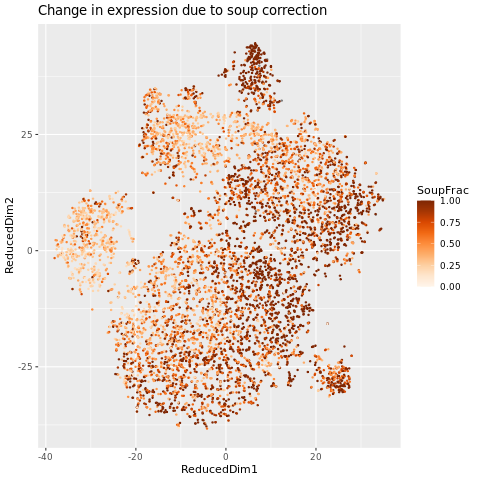

In [10]:
%%R
plotChangeMap(sce, out, "vsg-2-Tb427.BES40.22")

In [11]:
#%%R
#vsgGenes = c("vsg-6-Tb427.BES15.12", "vsg-2-Tb427.BES40.22")
#useToEst = estimateNonExpressingCells(sce, nonExpressedGeneList = list(vsgGenes = vsgGenes))
#sce = calculateContaminationFraction(sce, list(vsgGenes = vsgGenes), useToEst = useToEst)

In [12]:
#%%R
#sce = calculateContaminationFraction(sce, 
#                                     list(vsgGenes = vsgGenes), 
#                                     useToEst = useToEst, forceAccept=TRUE)

In [13]:
#%%R
#plotMarkerDistribution(sce)

# Load dataset

In [14]:
%%R
sce <- SingleCellExperiment(assays = list(counts = out))
sce

class: SingleCellExperiment 
dim: 11497 6863 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(6863): AAACCCACACCAGACC-1 AAACCCAGTAGTTACC-1 ...
  TTTGTTGTCCGGACGT-1 TTTGTTGTCGGTAGGA-1
colData names(0):
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [15]:
%%R
assayNames(sce)

[1] "counts"


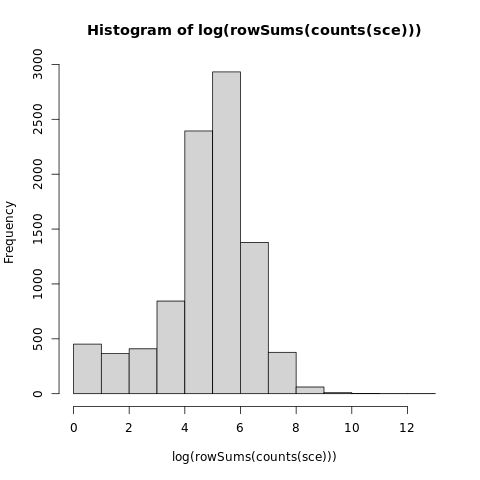

In [16]:
%%R
hist(log(rowSums(counts(sce))))

In [17]:
%%R
head(colSums(counts(sce))>25)

AAACCCACACCAGACC-1 AAACCCAGTAGTTACC-1 AAACCCAGTTTCACAG-1 AAACCCATCATAAGGA-1 
              TRUE               TRUE               TRUE               TRUE 
AAACGAACACCTGAAT-1 AAACGAACATCCAACA-1 
              TRUE               TRUE 


In [18]:
'''
%%R
%%R
sce <- SingleCellExperiment(assays = list(counts = out))
sce

is.vsg <- grepl("^vsg-", rownames(sce))
sce_vsg <- sce[which(is.vsg), ]
keep_feature <- colSums(counts(sce_vsg)) > 0
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg


test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_1.csv",sep=''),sep = ",")
'''

'\n%%R\n%%R\nsce <- SingleCellExperiment(assays = list(counts = out))\nsce\n\nis.vsg <- grepl("^vsg-", rownames(sce))\nsce_vsg <- sce[which(is.vsg), ]\nkeep_feature <- colSums(counts(sce_vsg)) > 0\nsce_vsg <- sce_vsg[, keep_feature]\nsce_vsg\n\n\ntest <- as.matrix(counts(sce_vsg))\nwrite.table(test,file=paste("new_count_vsg_vex2_1.csv",sep=\'\'),sep = ",")\n'

In [19]:
#df = pd.read_csv("new_count_vsg_vex2_1.csv")
#df.head()
#rownames(sce)
#is.vsg <- grepl("^vsg-", rownames(sce))

In [20]:
#select = df.loc[['vsg-17-Tb427.BES56.13',
#                'vsg-15-Tb427.BES134.6',
#                'vsg-6-Tb427.BES15.12',
#                'vsg-2-Tb427.BES40.22']]
#df.sum(axis=1).sort_values()

In [21]:
#select = select.T
#select['ngroup']=(select>0).sum(axis=1)
#select.head()
#sce_vsg <- sce[which(is.vsg2), ]
#is.vsg19 <- grepl("vsg-19-", rownames(sce_vsg))
#sce_vsg <- sce_vsg[which(!is.vsg19), ]
#sce_vsg

In [22]:
#select.sort_values('vsg-17-Tb427.BES56.13')

In [23]:
#select.groupby('ngroup').plot(x='vsg-17-Tb427.BES56.13',y='vsg-2-Tb427.BES40.22',kind='scatter')

In [24]:
#import numpy as np
#np.log1p(select['vsg-17-Tb427.BES56.13']).plot(kind='hist')

In [25]:
#%%R
#plotExprsFreqVsMean(sce)

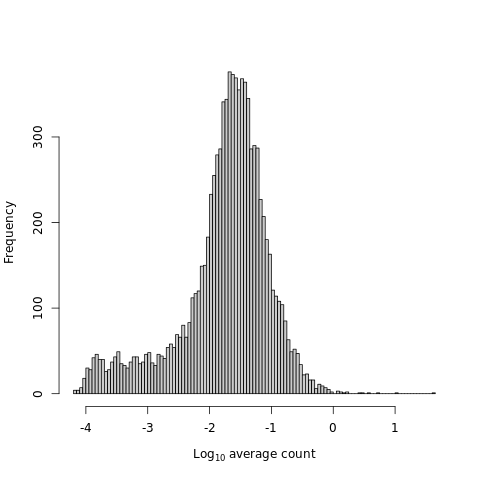

In [26]:
%%R
ave.counts <- calculateAverage(sce)
hist(log10(ave.counts), breaks=100, main="", col="grey80", 
    xlab=expression(Log[10]~"average count"))

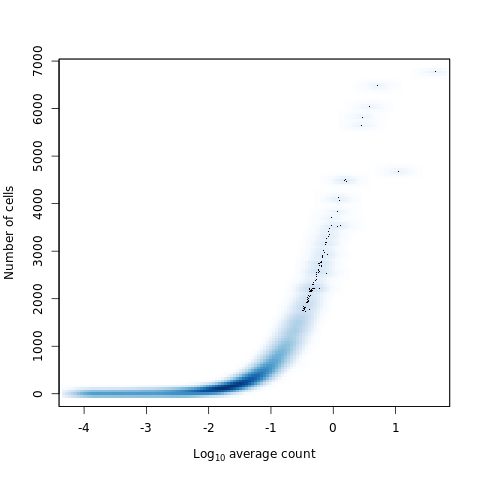

In [27]:
%%R
num.cells <- nexprs(sce, byrow=TRUE)
smoothScatter(log10(ave.counts), num.cells, ylab="Number of cells", 
    xlab=expression(Log[10]~"average count"))

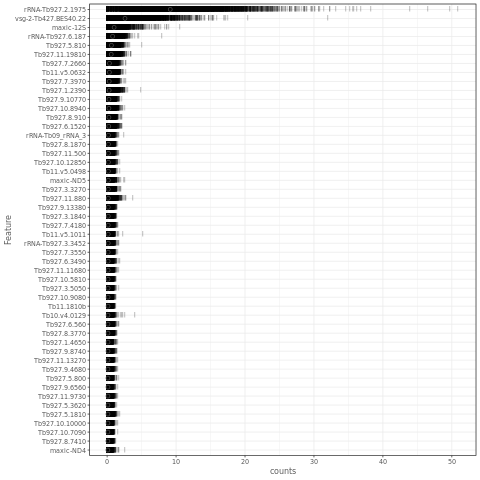

In [28]:
%%R
plotHighestExprs(sce,  as_percentage = TRUE)

# Add QC 
Default testing sum and detected transcripts plus:
- maxicircle
- ribosomal RNA
- VSGs

In [29]:
%%R
is.mito <- grepl("^maxic", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
is.Ribo <-grepl("^rRNA-", rownames(sce)) 
df <- perCellQCMetrics(counts(sce), subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
head(df)

DataFrame with 6 rows and 11 columns
                         sum  detected subsets_Mito_sum subsets_Mito_detected
                   <numeric> <integer>        <numeric>             <integer>
AAACCCACACCAGACC-1       468       397                6                     3
AAACCCAGTAGTTACC-1       451       317               16                     5
AAACCCAGTTTCACAG-1       490       366                8                     4
AAACCCATCATAAGGA-1       472       354               16                     3
AAACGAACACCTGAAT-1       497       370                7                     2
AAACGAACATCCAACA-1       374       266                7                     1
                   subsets_Mito_percent subsets_VSG_sum subsets_VSG_detected
                              <numeric>       <numeric>            <integer>
AAACCCACACCAGACC-1              1.28205               0                    0
AAACCCAGTAGTTACC-1              3.54767               0                    0
AAACCCAGTTTCACAG-1             

In [30]:
#%%R
#sce <- perCellQCMetrics(sce, subsets=list(vsg=is.vsg, Mt=is.mito, Ribo=is.Ribo))

#par(mfrow=c(2,2), mar=c(5.1, 4.1, 0.1, 0.1))
#hist(sce$total_counts/1e3, xlab="Library sizes (thousands)", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$total_features, xlab="Number of expressed genes", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$pct_counts_Ribo, xlab="ERCC proportion (%)",
#    ylab="Number of cells", breaks=20, main="", col="grey80")
#hist(sce$pct_counts_Mt, xlab="Mitochondrial proportion (%)", 
#    ylab="Number of cells", breaks=20, main="", col="grey80")


In [31]:
#%%R
#sce$pct_counts_Ribo

In [32]:
#%%R
#sum(is.Ribo)

# Test x outlayers

In [33]:
%%R
# not too high / not too low
qc.lib2 <- isOutlier(df$sum, nmads = 1, log=TRUE, type="lower")
qc.lib2b <- isOutlier(df$sum, nmads = 3, log=TRUE, type="higher")
qc.nexprs2 <- isOutlier(df$detected, nmads = 1, log=TRUE, type="lower")
qc.vsg2 <- isOutlier(df$subsets_VSG_percent, nmads = 1, type="lower")

# not too high
qc.mito2 <- isOutlier(df$subsets_Mito_percent, nmads = 2, type="higher")
qc.ribo2 <- isOutlier(df$subsets_Ribo_percent, nmads = 2, type="higher")

discard2 <- qc.lib2 | qc.nexprs2 | qc.mito2 | qc.ribo2 | qc.vsg2 | qc.lib2b
sum(discard2)

[1] 1989


## add discarded info to the sce object

In [34]:
%R sce$discard_mito <- qc.mito2
%R sce$discard_sum <- qc.lib2
%R sce$discard_sum2 <- qc.lib2b
%R sce$discard_detect <- qc.nexprs2
%R sce$discard_vsg <- qc.vsg2
%R sce$discard_ribo <- qc.ribo2

%R sce$discard_all <- discard2

0,1,0,...,0,0,0


## quick add qc to sce

In [35]:
%%R
sce <- addPerCellQC(sce, subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
sce

class: SingleCellExperiment 
dim: 11497 6863 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(6863): AAACCCACACCAGACC-1 AAACCCAGTAGTTACC-1 ...
  TTTGTTGTCCGGACGT-1 TTTGTTGTCGGTAGGA-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [36]:
%%R
sce <- sce[, which(!discard2)]
sce

class: SingleCellExperiment 
dim: 11497 4874 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(4874): AAACCCACACCAGACC-1 AAACCCAGTTTCACAG-1 ...
  TTTGTTGTCCGGACGT-1 TTTGTTGTCGGTAGGA-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [37]:
%%R
test <- as.matrix(counts(sce))
write.table(test,file=paste("VSG2_2_all_genes.csv",sep=''),sep = ",")

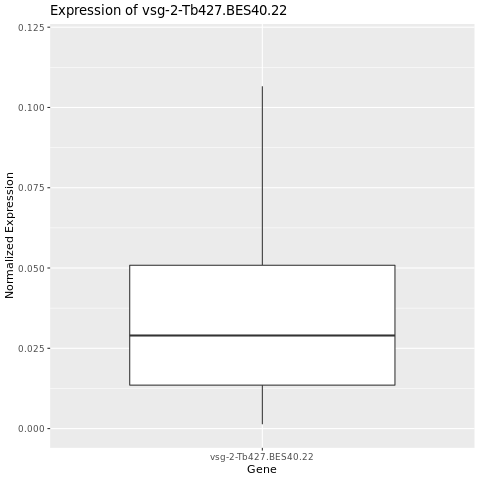

In [44]:
%%R

plot_gene_expression <- function(sce, gene) {
  # Extract count data
  counts <- assays(sce)$counts
  
  # Extract gene counts and total counts for each cell
  gene_counts <- counts[gene, ]
  total_counts <- colSums(counts)
  
  # Filter out cells with zero counts for the given gene
  nonzero <- gene_counts > 0
  gene_counts <- gene_counts[nonzero]
  total_counts <- total_counts[nonzero]
  
  # Normalize gene counts by total counts for each cell
  ratios <- gene_counts / total_counts
  
  # Create data frame
  df <- data.frame(Ratio = ratios)
  
  # Calculate the 1st and 3rd quartiles and the interquartile range
  Q1 <- quantile(df$Ratio, 0.25)
  Q3 <- quantile(df$Ratio, 0.75)
  IQR <- Q3 - Q1
  
  # Set the y-axis limits to the [1st quartile - 1.5*IQR, 3rd quartile + 1.5*IQR] range
  y_min <- 0 #max(0, Q1 - 1.5 * IQR)
  y_max <- 0.12#Q3 + 1.5 * IQR
  
  write.csv(df, file = 'VSG2_2.boxplot.csv', row.names = FALSE)  
  # Plot
  ggplot(df, aes(x = gene, y = Ratio)) +
    geom_boxplot(outlier.shape = NA) +  # This line removes the outliers
    coord_cartesian(ylim = c(y_min, y_max)) +  # This line sets the y-axis limits
    labs(title = paste("Expression of", gene), x = "Gene", y = "Normalized Expression")
}


# Call the function
plot_gene_expression(sce, "vsg-2-Tb427.BES40.22")


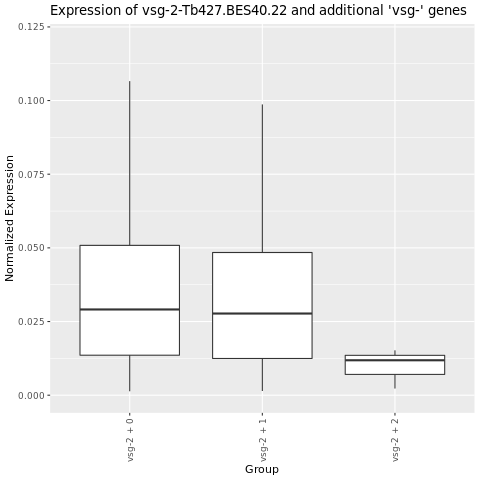

In [42]:
%%R
library(ggplot2)
library(SingleCellExperiment)

plot_gene_expression <- function(sce, main_gene, max_additional_genes = 6) {
  # Extract count data
  counts <- assays(sce)$counts
  
  # Identify the 'vsg-' genes
  vsg_genes <- rownames(counts)[grepl("^vsg-", rownames(counts)) & rownames(counts) != main_gene]
  
  # Get the counts for the main gene and the 'vsg-' genes
  main_gene_counts <- counts[main_gene, ]
  vsg_gene_counts <- counts[vsg_genes, ]
  
  # Identify which cells express the main gene and how many additional 'vsg-' genes each cell expresses
  main_gene_expressed <- main_gene_counts > 0
  additional_genes_expressed <- rowSums(t(vsg_gene_counts) > 0)
  
  # Initialize a data frame to store all the data
  df_all <- data.frame(Group = character(), Ratio = numeric())
  
  # Filter the cells based on the main gene expression and the number of additional 'vsg-' genes expressed
  for (i in 0:max_additional_genes) {
    cells <- main_gene_expressed & additional_genes_expressed == i
    if (any(cells)) {
      # Calculate the ratios for the main gene in the selected cells
      gene_counts <- main_gene_counts[cells]
      total_counts <- colSums(counts[, cells])
      ratios <- gene_counts / total_counts
      
      # Create a data frame
      df <- data.frame(Group = paste("vsg-2 +", i), Ratio = ratios)
      
      # Add the data to the main data frame
      df_all <- rbind(df_all, df)
    }
      
  write.csv(df_all, file = 'VSG2_2.boxplot.csv', row.names = FALSE)
  }
  
    
  y_min <- 0 #max(0, Q1 - 1.5 * IQR)
  y_max <- 0.12#Q3 + 1.5 * IQR
   
  # Plot
  ggplot(df_all, aes(x = Group, y = Ratio)) +
    geom_boxplot(outlier.shape = NA) +  # This line removes the outliers
    coord_cartesian(ylim = c(y_min, y_max)) +  # This line removes the outliers
    labs(title = paste("Expression of", main_gene, "and additional 'vsg-' genes"), x = "Group", y = "Normalized Expression") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
}

# Call the function
plot_gene_expression(sce, "vsg-2-Tb427.BES40.22")


In [30]:
%%R
#is.vsg6 <- grepl("^vsg-6-", rownames(sce))
#is.vsg8 <- grepl("^vsg-8-", rownames(sce))
#is.vsg15 <- grepl("^vsg-15-", rownames(sce))
#is.vsg17 <- grepl("^vsg-17-", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
#is.vsg <- is.vsg6 | is.vsg8 | is.vsg15 | is.vsg17 | is.vsg2

In [37]:
%%R

#is.vsg <- grepl("^vsg-", rownames(sce))
sce_vsg <- sce[which(is.vsg), ]
sce_vsg
#sce_vsg <- SingleCellExperiment(assays = list(counts = counts(sce_vsg))

#sce_vsg

class: SingleCellExperiment 
dim: 22 6179 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(6179): AAACCCAAGGTACATA-1 AAACCCAAGTTGTAAG-1 ...
  TTTGTTGGTTGCCGCA-1 TTTGTTGTCAGACCCG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [38]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("temp_count_vsg_vex2_1.csv",sep=''),sep = ",")


In [39]:
temp_count = pd.read_csv('temp_count_vsg_vex2_1.csv')
temp_count.head()

,AAACCCAAGGTACATA-1,AAACCCAAGTTGTAAG-1,AAACCCACACCTTCCA-1,AAACCCACAGTTTCAG-1,AAACCCACATGAATAG-1,AAACCCACATGTGGCC-1,AAACCCAGTAACTAAG-1,AAACCCAGTGATGGCA-1,AAACCCATCTACACAG-1,AAACGAAAGACGCCAA-1,...,TTTGGTTTCCAGCACG-1,TTTGGTTTCGAAATCC-1,TTTGTTGAGAGGGCGA-1,TTTGTTGAGGGTAATT-1,TTTGTTGAGGTCGCCT-1,TTTGTTGAGTGGTTAA-1,TTTGTTGCAATAGGGC-1,TTTGTTGCAGCGTAGA-1,TTTGTTGGTTGCCGCA-1,TTTGTTGTCAGACCCG-1
vsg-2-Tb427.BES40.22,69,39,37,59,36,33,28,15,25,49,...,41,31,80,32,37,26,40,42,43,12
vsg-9-Tb427.BES129.14,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
vsg-6-Tb427.BES15.12,1,8,4,5,3,4,7,6,2,2,...,8,7,0,4,2,0,8,2,4,11
vsg-21-Tb427.BES28.15,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
vsg-18-Tb427.BES98.12,0,2,0,0,3,0,0,0,0,0,...,2,2,0,1,0,0,1,0,0,1


In [40]:
temp_count.sum(axis=1).sort_values()

vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-639           7
vsg-mes-Tb427VSG-559          11
vsg-16-Tb427.BES122.11        33
vsg-mes-Tb427VSG-3591         42
vsg-mes-Tb427VSG-636          51
vsg-mes-Tb427VSG-1954         97
vsg-21-Tb427.BES28.15        198
vsg-mes-Tb427VSG-531         261
vsg-mes-Tb427VSG-397         333
vsg-3-Tb427.BES65.13         476
vsg-14-Tb427.BES64.2         512
vsg-9-Tb427.BES129.14        574
vsg-mes-Tb427VSG-653         644
vsg-11-Tb427.BES126.15       689
vsg-13-Tb427.BES51.12        693
vsg-18-Tb427.BES98.12       3147
vsg-8-Tb427.BES29.9         6860
vsg-17-Tb427.BES56.13      10262
vsg-15-Tb427.BES134.6      11698
vsg-6-Tb427.BES15.12       20147
vsg-2-Tb427.BES40.22      227601
dtype: int64

In [41]:
temp_count.loc['vsg-2-Tb427.BES40.22'].describe()

count    6179.000000
mean       36.834601
std        20.885477
min         0.000000
25%        22.000000
50%        32.000000
75%        47.000000
max       230.000000
Name: vsg-2-Tb427.BES40.22, dtype: float64

In [42]:
'''
%%R
is.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))
is.mes639 <- grepl("vsg-mes-Tb427VSG-639", rownames(sce_vsg))
is.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))
#is.mes3591 <- grepl("^vsg-mes-Tb427VSG-3591", rownames(sce_vsg))
#is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))
#is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))

discard <- is.vsg19 | is.mes639 |is.mes559 #| is.mes559 | is.mes3591 | is.vsg16 | is.mes636
retain <- !discard
head(retain)

sce_vsg <- sce_vsg[which(retain), ]
sce_vsg
'''

'\n%%R\nis.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))\nis.mes639 <- grepl("vsg-mes-Tb427VSG-639", rownames(sce_vsg))\nis.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))\n#is.mes3591 <- grepl("^vsg-mes-Tb427VSG-3591", rownames(sce_vsg))\n#is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))\n#is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))\n\ndiscard <- is.vsg19 | is.mes639 |is.mes559 #| is.mes559 | is.mes3591 | is.vsg16 | is.mes636\nretain <- !discard\nhead(retain)\n\nsce_vsg <- sce_vsg[which(retain), ]\nsce_vsg\n'

In [43]:
'''
%%R
keep_feature <- colSums(counts(sce_vsg)) > 25
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

'''



'\n%%R\nkeep_feature <- colSums(counts(sce_vsg)) > 25\nsce_vsg <- sce_vsg[, keep_feature]\nsce_vsg\n\n'

In [44]:
%%R
#sce_vsg <- SingleCellExperiment(assays = list(counts = as.matrix(counts(sce_vsg)))
sce_vsg

class: SingleCellExperiment 
dim: 22 6179 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(6179): AAACCCAAGGTACATA-1 AAACCCAAGTTGTAAG-1 ...
  TTTGTTGGTTGCCGCA-1 TTTGTTGTCAGACCCG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [45]:
%%R
saveRDS(sce_vsg, paste("sce_vsg_vex2_1.rds",sep=''))

In [46]:
#%%R
#test <- as.matrix(counts(sce_vsg))
#write.table(test,file=paste("new_count_vsg_vex2_1_681517.csv",sep=''),sep = ",")



In [47]:
print(1)

1


In [48]:
%%R
keep_feature <- colSums(counts(sce_vsg)) > 45
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

class: SingleCellExperiment 
dim: 22 2544 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(2544): AAACCCAAGGTACATA-1 AAACCCAAGTTGTAAG-1 ...
  TTTGTTGCAATAGGGC-1 TTTGTTGGTTGCCGCA-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [49]:
%%R
#clust.sce <- quickCluster(sce_vsg)
sce_vsg <- computeSumFactors(sce_vsg)#, cluster=clust.sce, min.mean=0.1)
sce_vsg <- logNormCounts(sce_vsg)
assayNames(sce_vsg)

[1] "counts"    "logcounts"


In [50]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_1.csv",sep=''),sep = ",")



In [51]:
%%R
test <- as.matrix(logcounts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_1_norm.csv",sep=''),sep = ",")



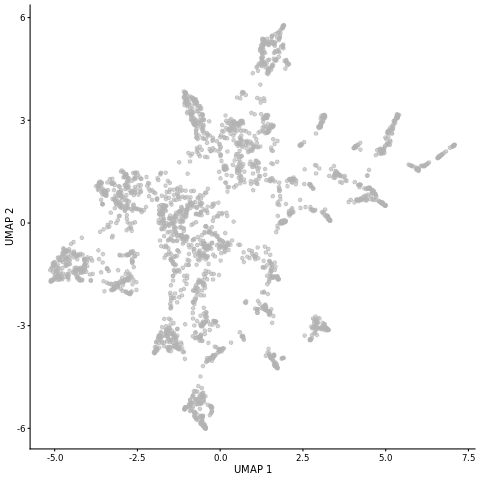

In [52]:
%%R
sce_vsg <- runUMAP(sce_vsg)
#sce_vsg
plotReducedDim(sce_vsg, dimred="UMAP")

In [53]:
%%R
library(bluster)
#clust.5 <- clusterCells(sce.pbmc, use.dimred="PCA", )


#nn.clusters <- clusterCells(sce_vsg, use.dimred="UMAP")
nn.clusters <- clusterCells(sce_vsg, assay.type='logcounts', BLUSPARAM=NNGraphParam(k=25))
table(nn.clusters)


nn.clusters
  1   2   3   4   5   6   7   8   9  10  11  12 
157 336  46 156 151 214 703 239  57 127 189 169 


## Plot Cluster
- here an attempt to use log counts for clustering.
- the cluster are visualized using umap 


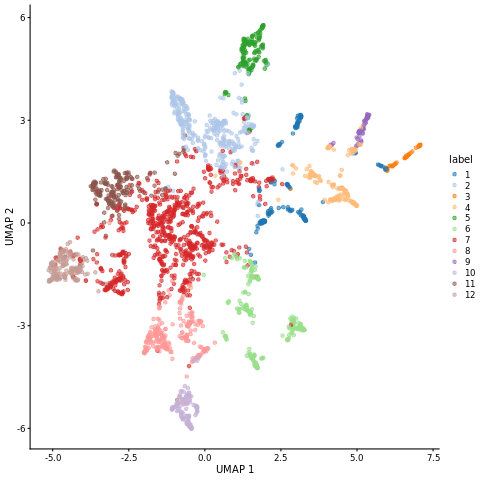

In [54]:
%%R
colLabels(sce_vsg) <- nn.clusters
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

## Plot z-score
here we compute and plot z scores for each vsgs

R[write to console]: 
Attaching package: 'celda'


R[write to console]: The following objects are masked from 'package:scater':

    normalizeCounts, plotHeatmap


R[write to console]: The following object is masked from 'package:scuttle':

    normalizeCounts


R[write to console]: The following object is masked from 'package:S4Vectors':

    params




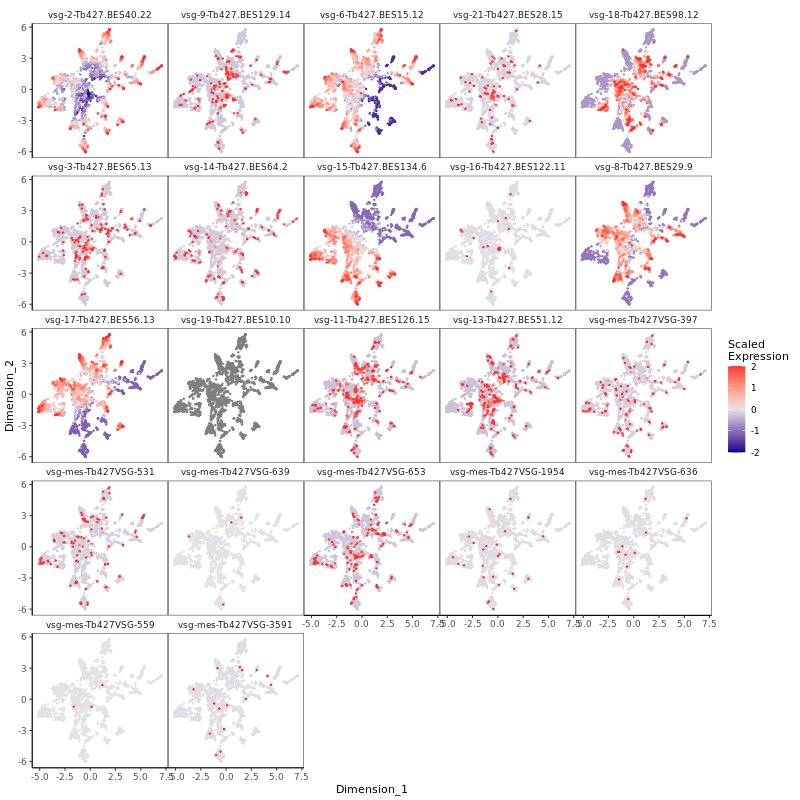

In [55]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE)

## Plot log counts
here we plot the log counts of the vsgs withput scaling

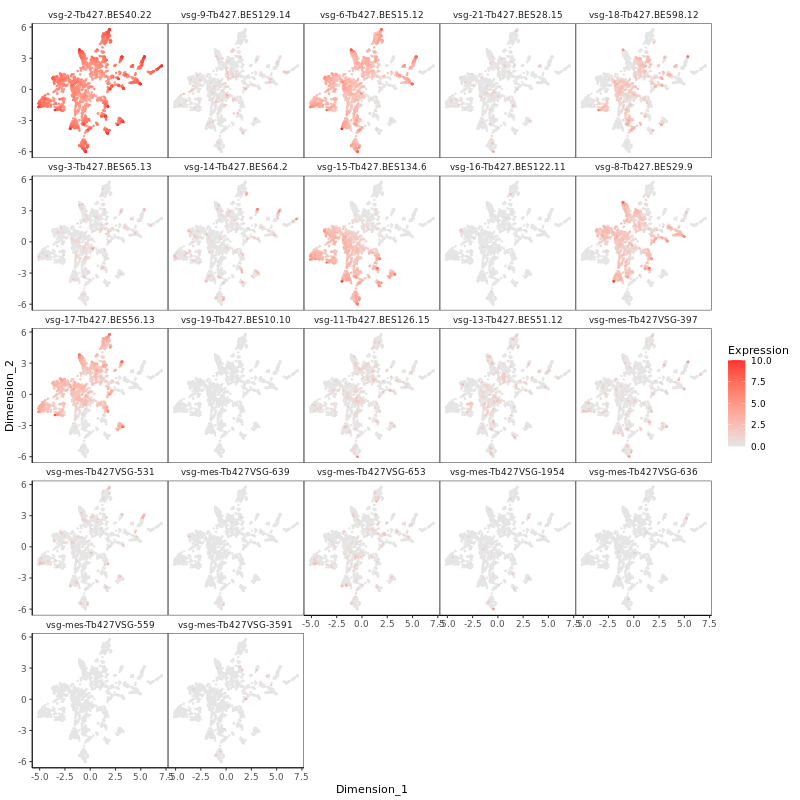

In [56]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE,
    zscore=FALSE,
    trim = c(0, 10),                 
    limits = c(0, 10),)

In [57]:
%%R
max(logcounts(sce_vsg))

[1] 16.38401


In [58]:
%%R
head(colLabels(sce_vsg))

[1] 7  7  10 12 2  5 
Levels: 1 2 3 4 5 6 7 8 9 10 11 12


In [59]:
%%R
rd<-reducedDim(sce_vsg, "UMAP")[,1:2]

In [60]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']



In [61]:
%%R
lab<-colLabels(sce_vsg)
head(lab)

[1] 7  7  10 12 2  5 
Levels: 1 2 3 4 5 6 7 8 9 10 11 12


In [62]:
%R -o lab
umap = pd.concat([pd.read_csv('new_count_vsg_vex2_1_norm.csv').T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv('new_count_vsg_vex2_1_norm.csv')
umap.head()



,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,5.514761,0.720821,0.720821,0.0,0.000000,0.000000,0.720821,2.084268,0.0,0.720821,...,0.0,0.0,0.720821,0.0,0.0,0.0,0.0,0.822632,-0.986589,7
AAACCCAAGTTGTAAG-1,4.675201,0.000000,2.593525,0.0,1.175639,0.704398,0.000000,1.814697,0.0,1.530267,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.000135,0.402037,7
AAACCCACACCTTCCA-1,6.339700,0.000000,3.270191,0.0,0.000000,0.000000,1.660808,3.270191,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.276250,-5.388919,10
AAACCCACAGTTTCAG-1,7.669428,0.000000,4.183289,0.0,0.000000,0.000000,0.000000,2.148447,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-4.889470,-1.560934,12
AAACCCACATGAATAG-1,5.348045,0.000000,2.107987,0.0,2.107987,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.649778,1.949765,2


In [63]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [64]:
%R -o lab
umap = pd.concat([pd.read_csv("new_count_vsg_vex2_1.csv").T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv("new_count_vsg_vex2_1.csv")
umap.head()




,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,1,0,0,0,0,0.822632,-0.986589,7
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,-1.000135,0.402037,7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,-0.276250,-5.388919,10
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-4.889470,-1.560934,12
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0.649778,1.949765,2


In [65]:
%%R
count_feature <- colSums(counts(sce_vsg)>0)


## Plot umap vsg size
The umap is color coded by the number ov vsgs expressed in each cell
The center yellow blob show the cell expressin all 5 vsgs

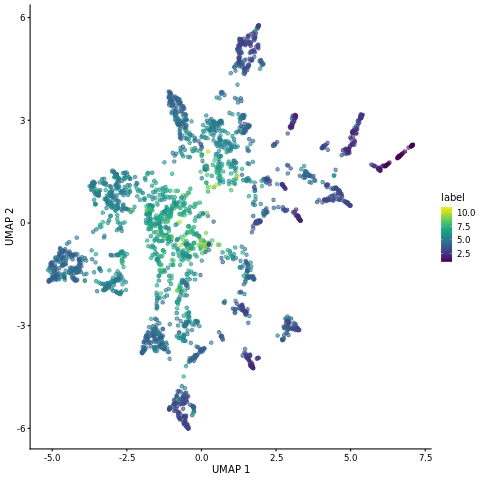

In [66]:
%%R
colLabels(sce_vsg) <- count_feature
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

In [67]:
#%%R
#is.vsg6_8 <- is.vsg6 | is.vsg8 
#is.other <- is.vsg15 | is.vsg17 | is.vsg2
#is.vsg6_8 <- is.vsg6_8 & is.other 
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,1,0,0,0,0,0.822632,-0.986589,7
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,-1.000135,0.402037,7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,-0.276250,-5.388919,10
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-4.889470,-1.560934,12
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0.649778,1.949765,2


In [68]:
umap.sum().drop(['comp1','comp2','clusters']).sort_values()

vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-639           4
vsg-mes-Tb427VSG-559           5
vsg-mes-Tb427VSG-3591         17
vsg-16-Tb427.BES122.11        24
vsg-mes-Tb427VSG-636          24
vsg-mes-Tb427VSG-1954         30
vsg-21-Tb427.BES28.15        108
vsg-mes-Tb427VSG-531         121
vsg-mes-Tb427VSG-397         152
vsg-14-Tb427.BES64.2         215
vsg-3-Tb427.BES65.13         287
vsg-mes-Tb427VSG-653         287
vsg-9-Tb427.BES129.14        401
vsg-11-Tb427.BES126.15       445
vsg-13-Tb427.BES51.12        486
vsg-18-Tb427.BES98.12       2113
vsg-8-Tb427.BES29.9         3863
vsg-17-Tb427.BES56.13       6333
vsg-15-Tb427.BES134.6       6720
vsg-6-Tb427.BES15.12       12677
vsg-2-Tb427.BES40.22      139881
dtype: object

In [69]:
select = umap.drop(['comp1','comp2','clusters'],axis=1)
select.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,0,1,0,0,0,0
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,0,0,0
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [70]:
vsg_class = []
for n in range(select.shape[0]):
    temp = select.iloc[n]
    temp = temp[temp>0]
    temp = list(temp.index)
    temp.sort()
    #print(temp)
    temp = [b for b in temp if b not in ['comp1','comp2']]
    temp.sort()
    temp=tuple(temp)
    vsg_class.append(temp)
    
    

umap['vsg_class'] = vsg_class
umap['size_class'] = [len(n) for n in  umap['vsg_class']]
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,1,0,0,0,0,0.822632,-0.986589,7,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,-1.000135,0.402037,7,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,-0.276250,-5.388919,10,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,-4.889470,-1.560934,12,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0.649778,1.949765,2,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5


In [71]:
umap.vsg_class.value_counts().head(10)

(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                           157
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-18-Tb427.BES98.12, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)    132
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                127
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                       100
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                                                   84
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                                                   82
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                        74
(vsg-1

In [72]:
umap.size_class.value_counts()

4     593
5     584
6     429
3     395
7     239
2     142
8      80
1      41
9      29
10     11
11      1
Name: size_class, dtype: int64

In [73]:
umap.to_csv("new_count_vsg_vex2_1.csv")
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,1,0,0,0,0,0.822632,-0.986589,7,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,-1.000135,0.402037,7,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,-0.276250,-5.388919,10,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,-4.889470,-1.560934,12,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0.649778,1.949765,2,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5


In [74]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('new_count_vsg_vex2_1.csv',index_col =[0])
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,1,0,0,0,0,0.822632,-0.986589,7,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,-1.000135,0.402037,7,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,-0.276250,-5.388919,10,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,-4.889470,-1.560934,12,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0.649778,1.949765,2,"('vsg-13-Tb427.BES51.12', 'vsg-17-Tb427.BES56....",5


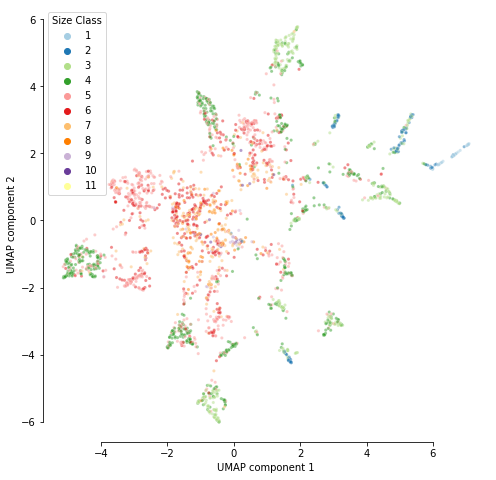

In [75]:
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='size_class', ax=ax,
                alpha=0.5, s=10,palette ='Paired')
ax.legend(title='Size Class')
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')
sns.despine(fig,trim=True)